In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

Pre-Processing

In [36]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:, :-1].values # note thatg only x will be used to train
y = dataset.iloc[:,-1].values # y is just used for comparison later

sc = MinMaxScaler(feature_range=(0, 1))
sc.fit_transform(x)

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

Training the SOM

In [37]:
# x, y = size of the SOM grid
# input length is the number of features (14 metrics in dataset + 1st column which is Customer ID)
# sigma is the neighbourhood radius
# learning rate determines the speed of convergence.
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
# initialize the weights
som.random_weights_init(x)

In [42]:
# train the som
som.train_random(data=x, num_iteration=100)

Visualization

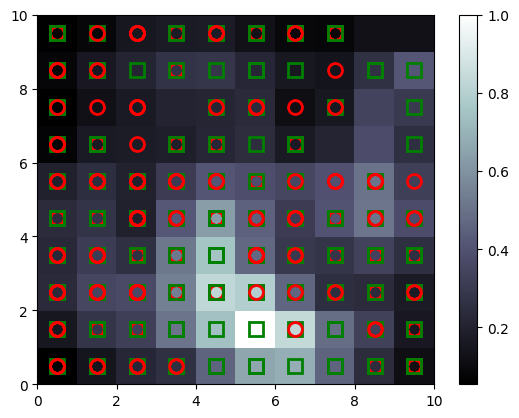

In [53]:
bone() # creates an empty window
pcolor(som.distance_map().T) # plots the SOM
colorbar() # specifies legend
# add markers everywhere to show customer approval status (winning node)
markers = ['o', 's'] # o - circle [0], s - square [1]
colors = ['r', 'g'] # r - red, g - green

for i, j in enumerate(x): # i - index of customers, j - vectors of customers at every iteration
    # get the winning node for the respective customer
    w = som.winner(j)
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None',
         markersize = 10, 
         markeredgewidth = 2) # the marker is placed on the center of the coordinates.
    
show()

Listing down frauds

In [51]:
mappings = som.win_map(x) # dictionary
frauds = np.concatenate((mappings[(6, 8)], mappings[(8, 1)]), axis=0) # using the coordinates of the cell in the map that corresponds to value 1 in colormap., 
frauds = sc.inverse_transform(frauds)


In [52]:
frauds

array([[3.92265931e+12, 0.00000000e+00, 1.53194500e+03, 6.41200000e+01,
        5.00000000e+00, 1.44000000e+02, 6.50000000e+01, 6.52650000e+01,
        1.00000000e+00, 1.00000000e+00, 4.69000000e+02, 1.00000000e+00,
        5.00000000e+00, 2.80000000e+05, 2.38500001e+08],
       [3.94329991e+12, 0.00000000e+00, 1.27193000e+03, 2.52000000e+02,
        5.00000000e+00, 7.90000000e+01, 3.30000000e+01, 2.13750000e+01,
        1.00000000e+00, 1.00000000e+00, 1.34000000e+02, 0.00000000e+00,
        5.00000000e+00, 1.76000000e+05, 5.92000010e+07],
       [3.94229675e+12, 0.00000000e+00, 1.28855500e+03, 1.63800000e+01,
        3.00000000e+00, 7.90000000e+01, 3.30000000e+01, 1.66725000e+01,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 3.20000000e+05, 1.00001000e+05],
       [3.94313933e+12, 0.00000000e+00, 3.18912500e+03, 2.24000000e+02,
        5.00000000e+00, 1.05000000e+02, 3.30000000e+01, 2.24437500e+02,
        1.00000000e+00, 1.00000000e+0